## Import Packages

In [1]:
import os
from torch.utils.data import DataLoader
from torchvision import transforms as T

from util.data import CocoCaptionReshape, rand_split, show_images, coco_info


In [2]:
# install pycocotools (coco api)
try:
  import pycocotools
  print("pycocotools has existed, import successfully")
except:
    print("torchvision.datasets.CocoDetection requires the COCO API to be installed.")
    print(f"COCO API for python: pycocotools. Do you want to install pycocotools right now? [y/n]")
    install = input()
    if install == 'y':
        # WARN: recommand setting env via conda. pip install pycocotools may bring some errors for numpy.
        # https://github.com/scikit-image/scikit-image/issues/5270
        os.system('conda install pycocotools')
        import pycocotools
    else:
        exit()

pycocotools has existed and import successfully


## Download dataset

download dataset (coco_val2017) file and unzip

In [5]:
! sh util/download_coco_val2017.sh

--2022-03-23 04:18:55--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.141.209
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.141.209|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: 'annotations_trainval2017.zip'

annotations_trainva 100%[===================>] 241.19M  28.8MB/s    in 8.6s    

2022-03-23 04:19:04 (27.9 MB/s) - 'annotations_trainval2017.zip' saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: data/coco/annotations/instances_train2017.json  
  inflating: data/coco/annotations/instances_val2017.json  
  inflating: data/coco/annotations/captions_train2017.json  
  inflating: data/coco/annotations/captions_val2017.json  
  inflating: data/coco/annotations/person_keypoints_train2017.json  
  inflating: data/coco/annotations/person_keypoints_val2017.json  
--2022-0

## Create custom Dataset and DataLoader

- Images in COCO datasets do not have a uniform shape, so reshape each image (3, _, _) -> (3, IMG_W, IMG_H), default IMG_W = IMG_H = 224
- CocoCaptionReshape._load_target() return one string: combine 5 sentences for each image -> 1 string

In [3]:
# download coco_val2017
image_dir = "data/coco/val2017"
ann_file = 'data/coco/ann_trainval2017/captions_val2017.json'

# Construct Dataset
print('-'*40)
coco_val2017 = CocoCaptionReshape(root = image_dir,
                                  annFile = ann_file,
                                  transform=T.PILToTensor())
print('-'*40)

----------------------------------------
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
----------------------------------------


In [4]:
# print dataset info
coco_info(coco_val2017)

----------------------------------------
description: COCO 2017 Dataset
url: http://cocodataset.org
version: 1.0
year: 2017
contributor: COCO Consortium
date_created: 2017/09/01
None
----------------------------------------
Number of samples: 5000
Image Size: torch.Size([3, 224, 224])
Caption: <class 'str'> 222
----------------------------------------


In [6]:
# Split dataset
train_ratio = 0.7
seed = 1

train_data, test_data = rand_split(coco_val2017, train_ratio=train_ratio, seed=seed)
print(f'train_ratio = {train_ratio}')
print(f'Split dataset into {len(train_data)} training samples and {len(test_data)} test samples, ')

train_ratio = 0.7
Split dataset into 3500 training samples and 1500 test samples, 


In [9]:
# Build Dataloader for traing and testing
batch_size = 64
train_ratio = 0.7
shuffle = False
n_workers = 0

train_dataloader = DataLoader(train_data, batch_size, shuffle, num_workers=n_workers)
test_dataloader = DataLoader(test_data, batch_size, shuffle,num_workers=n_workers)

# print info of dataloader
for train_img, tarin_cap in train_dataloader:
    print(f"Image batch shape: {train_img.size()}")
    print(f"Caption batch shape: {len(tarin_cap)}, {type(tarin_cap)}")
    break

Image batch shape: torch.Size([64, 3, 224, 224])
Caption batch shape: 64, <class 'tuple'>


Caption <class 'str'> 
A woman stands in the dining area at the table. A room with chairs, a table, and a woman in it. A woman standing in a kitchen by a window A person standing at a table in a room. A living area with a television and a table 


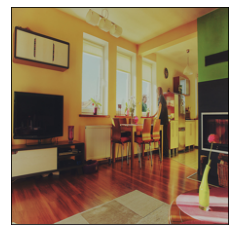

In [15]:
# show one sample
img, cap = coco_val2017[0] 
imgs = [img]
print(f"Caption {type(cap)} \n{cap}")
show_images(imgs)